In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('C://Users//Admin//OneDrive - Madanapalle Institute of Technology & Science//Desktop//Praveen Kumar//UK Car Accidents 2005-2015')    

In [2]:
accidents = pd.read_csv('Accidents0515.csv')
#casualities = pd.read_csv('Casualties0515.csv')
#vehicles = pd.read_csv('Vehicles0515.csv')

In [3]:
accidents.sample(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1614859,201450AY2G001,155243.0,32909.0,-5.427251,50.145545,50,3,1,1,23/02/2014,...,0,0,6,1,1,0,0,2,1,E01019007
1289188,2012331205762,459475.0,298515.0,-1.123685,52.581173,33,3,3,1,17/08/2012,...,0,0,1,2,2,0,0,2,1,E01025988


In [4]:
len(accidents)

1780653

In [6]:
accidents.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [7]:
accidents.dropna(how = 'any', subset = accidents.columns[:-1], inplace=True)

In [8]:
accidents['DATE'] = pd.to_datetime(accidents.Date)

In [9]:
import datetime as dt 
accidents['Year'] = accidents['DATE'].dt.year
accidents['Month'] = accidents['DATE'].dt.month
accidents['Day'] =  accidents['DATE'].dt.day

In [10]:
accidents[['Hour', 'Minute']] = accidents['Time'].str.split(':', expand=True)

In [11]:
for col in accidents.columns:
    if col not in ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']:
        accidents[col] = pd.Categorical(accidents[col])

In [12]:
accidents_df = accidents.drop(['LSOA_of_Accident_Location', 'DATE', 'Date', 'Accident_Index', 'Time', \
                                                                                       'Local_Authority_(Highway)'], axis=1)

In [13]:
X = accidents_df.drop('Accident_Severity', axis=1)
y = accidents_df['Accident_Severity']

Feature ranking:
1. feature 28 (0.062981) (Location_Easting_OSGR)
2. feature 30 (0.062324) (Location_Northing_OSGR)
3. feature 1 (0.061190) (Longitude)
4. feature 3 (0.061186) (Latitude)
5. feature 0 (0.061096) (Police_Force)
6. feature 2 (0.061081) (Number_of_Vehicles)
7. feature 29 (0.060374) (Number_of_Casualties)
8. feature 27 (0.058726) (Day_of_Week)
9. feature 26 (0.054383) (Local_Authority_(District))
10. feature 7 (0.050397) (1st_Road_Class)
11. feature 8 (0.048096) (1st_Road_Number)
12. feature 10 (0.047344) (Road_Type)
13. feature 5 (0.038298) (Speed_limit)
14. feature 6 (0.033819) (Junction_Detail)
15. feature 4 (0.028588) (Junction_Control)
16. feature 9 (0.026303) (2nd_Road_Class)
17. feature 21 (0.021110) (2nd_Road_Number)
18. feature 12 (0.020162) (Pedestrian_Crossing-Human_Control)
19. feature 20 (0.018184) (Pedestrian_Crossing-Physical_Facilities)
20. feature 13 (0.016440) (Light_Conditions)
21. feature 18 (0.014737) (Weather_Conditions)
22. feature 16 (0.014537) (Road

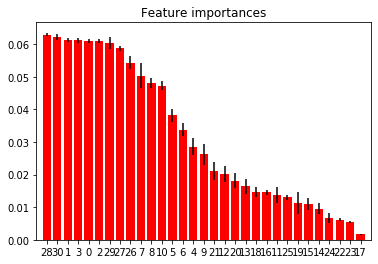

In [72]:
# Build a forest and compute the impurity-based feature importances
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) (%s)" % (f + 1, indices[f], importances[indices[f]], X.columns[f]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [73]:
FI = pd.DataFrame(importances, index = X.columns).rename(columns = {0:'Feature Imp'}).sort_values(by ='Feature Imp',
                                                                                                  ascending=False)
FI

,Feature Imp
Day,0.062981
Minute,0.062324
Location_Northing_OSGR,0.061190
Latitude,0.061186
Location_Easting_OSGR,0.061096
Longitude,0.061081
Hour,0.060374
Month,0.058726
Year,0.054383
Day_of_Week,0.050397


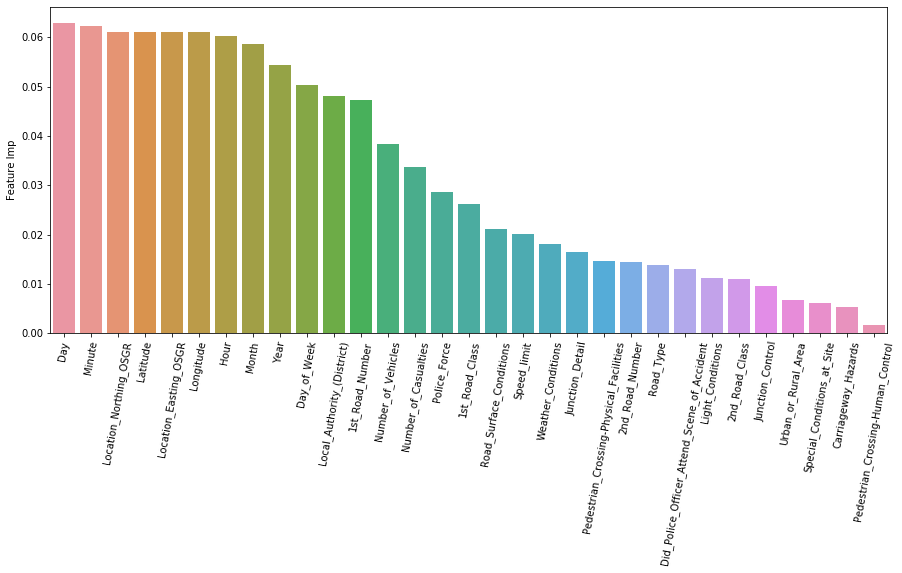

In [74]:
import seaborn as sns
plt.figure(figsize=(15,6))
plt.xticks(rotation=80)
sns.barplot(x=FI.index, y=FI['Feature Imp'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2, stratify = y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
preds = rf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
confusion_matrix(preds, y_test)

array([[     3,      4,      2],
       [   115,    513,    617],
       [  4481,  47889, 302449]], dtype=int64)

In [41]:
y.value_counts(normalize=True)*100

3    85.113887
2    13.594467
1     1.291646
Name: Accident_Severity, dtype: float64

In [23]:
f1_score(preds, y_test, average='weighted')

0.9162899645356823

In [35]:
preds[(preds==3 )|(preds==2)]

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [37]:
roc_auc_score(preds[(preds==3 )|(preds==2)], y_test[(preds==3 )|(preds==2)])

0.6820422066883108

In [38]:
roc_auc_score(preds[(preds==1)|(preds==2)], y_test[(preds==1)|(preds==2)])

0.6848282016956715

In [39]:
roc_auc_score(preds[(preds==1)|(preds==3)], y_test[(preds==1)|(preds==3)])

0.8347788277653929